# Example cases of SDSS query

In [31]:
# imports
from importlib import reload

import requests
from io import StringIO, BytesIO
from PIL import Image

from matplotlib import pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units

from astroquery.sdss import SDSS

from rf_meta_query import images

## Test RA/DEC

In [6]:
coord = SkyCoord('J081240.68+320809.0', unit=(units.hourangle, units.deg))

In [44]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (123.1695, 32.13583333)>

## Do a query

### Setup for meta data of interest

In [10]:
photoobj_fs = ['ra', 'dec', 'objid', 'run', 'rerun', 'camcol', 'field']
mags = ['petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z']
magsErr = ['petroMagErr_u', 'petroMagErr_g', 'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z']
#spec_fields = ['ra', 'dec', 'z', 'run2d', 'plate', 'fiberID', 'mjd', 'instrument']

### Other Parameters

In [17]:
radius=0.5*units.arcmin
timeout = 30. # seconds

### Query

In [18]:
phot_catalog = SDSS.query_region(coord, radius=radius, timeout=timeout,
                                 photoobj_fields=photoobj_fs+mags+magsErr)

In [19]:
phot_catalog

ra,dec,objid,run,rerun,camcol,field,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z
float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
123.161196150046,32.1378682225832,1237657775537521298,2864,301,4,106,23.26565,23.58841,21.83458,21.12266,20.16996,1.193582,0.7946455,0.2789228,0.2322823,0.4597496
123.16453026181,32.1411987613447,1237657775537520846,2864,301,4,106,22.08803,19.65694,18.21882,17.18019,16.66328,0.2291692,0.01412268,0.007011252,0.004663331,0.01082554
123.164542142531,32.1412005263838,1237657775537520845,2864,301,4,106,22.06848,19.63814,18.21876,17.18122,16.64994,0.2240221,0.01390511,0.006994893,0.004653853,0.01070175
123.167116702765,32.1282562564917,1237657775537521836,2864,301,4,106,23.35986,24.15181,26.01649,24.80073,20.54601,1.502583,1.3436,1.430407,2.405054,0.6907642
123.16766122946,32.1342384031541,1237657775537520844,2864,301,4,106,22.96884,20.75422,19.72793,19.28872,19.14515,0.466078,0.03331742,0.02162988,0.02281602,0.08342973
123.168282937797,32.1294679619694,1237657775537521841,2864,301,4,106,27.7445,26.52192,22.61738,24.16709,24.02173,0.2975118,0.9685107,0.6378359,2.562266,1.713091
123.169534700537,32.1357193228256,1237657775537520843,2864,301,4,106,19.67062,17.91037,17.51346,17.33699,17.18128,0.03277,0.004750669,0.0045466,0.00519813,0.01630831
123.169534700537,32.1357193228256,1237657775537520842,2864,301,4,106,19.28115,17.74466,17.31748,17.08764,16.66548,0.1677273,0.02521392,0.07739115,0.0460808,0.1487736
123.169546582556,32.1357212395852,1237657775537520841,2864,301,4,106,19.16389,17.66305,17.32551,17.16616,16.52074,0.176444,0.04300211,0.07475483,0.02923543,0.1569496


## Grab an image

### Generate URL

In [33]:
imsize = 1. # arcmin
sdss_url = images.sdsshttp(coord, imsize)
sdss_url

'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=123.16949999999999&dec=32.13583333333333&scale=0.39612&width=151&height=151&query='

### Grab it

In [24]:
rtv = requests.get(sdss_url) 

In [28]:
img = Image.open(BytesIO(rtv.content))

### Plot me

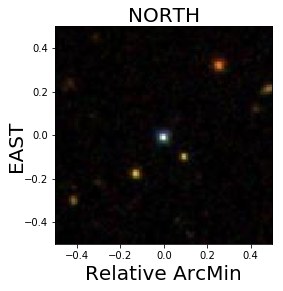

In [43]:
plt.clf()
plt.imshow(img,aspect='equal',extent=(-imsize/2., imsize/2, -imsize/2.,imsize/2))
# Label me
plt.xlabel('Relative ArcMin', fontsize=20)
xpos = 0.22*imsize
ypos = 0.02*imsize
plt.text(-imsize/2.-xpos, 0., 'EAST', rotation=90.,fontsize=20)
plt.text(0.,imsize/2.+ypos, 'NORTH', fontsize=20, horizontalalignment='center')
plt.savefig('tst.png', dpi=300)
#
plt.show()

### Write

In [40]:
img.save('tst.png')